In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [2]:
banknote_data = pd.read_csv("../Datasets/banknote.csv",sep=',')

In [3]:
banknote_data.head()

,variance,skewness,kurtosis,entropy,authentic
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
banknote_data= banknote_data.round()

In [5]:
banknote_data.head()

,variance,skewness,kurtosis,entropy,authentic
0,4.0,9.0,-3.0,-0.0,0
1,5.0,8.0,-2.0,-1.0,0
2,4.0,-3.0,2.0,0.0,0
3,3.0,10.0,-4.0,-4.0,0
4,0.0,-4.0,5.0,-1.0,0


In [6]:
X = banknote_data.values[:,0:4]
Y = banknote_data.values[:,4]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 100)

In [7]:
from sklearn.neural_network import MLPClassifier

In [8]:
mlp = MLPClassifier(hidden_layer_sizes=(4),max_iter=50)

In [9]:
mlp.fit(X_train,Y_train)

/Users/vish/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=4, learning_rate='constant',
       learning_rate_init=0.001, max_iter=50, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [10]:
predictions = mlp.predict(X_test)

In [11]:
from sklearn.metrics import classification_report, confusion_matrix

In [12]:
predictions

array([1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1.,
       0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1.,
       0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1.,
       0., 1., 1., 1., 1.

In [13]:
if predictions.all() == Y_test.all():
    print("100%")

100%


In [14]:
print(confusion_matrix(Y_test,predictions))

[[91 72]
 [19 93]]


In [15]:
print(classification_report(Y_test,predictions,target_names=['0','1']))

             precision    recall  f1-score   support

          0       0.83      0.56      0.67       163
          1       0.56      0.83      0.67       112

avg / total       0.72      0.67      0.67       275



In [16]:
print(mlp.predict_proba(X_test))

[[0.39599315 0.60400685]
 [0.44147864 0.55852136]
 [0.61721936 0.38278064]
 [0.81178689 0.18821311]
 [0.4169708  0.5830292 ]
 [0.89137737 0.10862263]
 [0.47186344 0.52813656]
 [0.94003549 0.05996451]
 [0.50500974 0.49499026]
 [0.79853265 0.20146735]
 [0.95827021 0.04172979]
 [0.25753394 0.74246606]
 [0.6096159  0.3903841 ]
 [0.38767239 0.61232761]
 [0.87986607 0.12013393]
 [0.8620735  0.1379265 ]
 [0.64691686 0.35308314]
 [0.63413276 0.36586724]
 [0.87217496 0.12782504]
 [0.10672472 0.89327528]
 [0.40418999 0.59581001]
 [0.45493165 0.54506835]
 [0.95380274 0.04619726]
 [0.38043814 0.61956186]
 [0.37084491 0.62915509]
 [0.42800456 0.57199544]
 [0.40345806 0.59654194]
 [0.56628489 0.43371511]
 [0.38767239 0.61232761]
 [0.74654738 0.25345262]
 [0.37084491 0.62915509]
 [0.79612675 0.20387325]
 [0.38767239 0.61232761]
 [0.45436324 0.54563676]
 [0.59914993 0.40085007]
 [0.41514592 0.58485408]
 [0.06745699 0.93254301]
 [0.38767239 0.61232761]
 [0.32154653 0.67845347]
 [0.34301537 0.65698463]


In [17]:
mlp = MLPClassifier(hidden_layer_sizes=(4),max_iter=100000)
mlp.fit(X_train,Y_train)
predictions = mlp.predict(X_test)

In [18]:
print(confusion_matrix(Y_test,predictions))

[[160   3]
 [  0 112]]


In [19]:
print(classification_report(Y_test,predictions,target_names=['0','1']))

             precision    recall  f1-score   support

          0       1.00      0.98      0.99       163
          1       0.97      1.00      0.99       112

avg / total       0.99      0.99      0.99       275



In [57]:
pkmn = pd.read_csv("../Datasets/Pokemon.csv")
pkmn.loc[pkmn['Legendary']==False,'Legendary']=0
pkmn.loc[pkmn['Legendary']==True,'Legendary']=1
pkmn

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,0
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,0
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,0
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,0
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,0
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,0
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,0


In [58]:
pkmn = pkmn.drop(['#','Name','Type 1','Type 2','Generation'],axis=1)
pkmn.isnull().sum()

Total        0
HP           0
Attack       0
Defense      0
Sp. Atk      0
Sp. Def      0
Speed        0
Legendary    0
dtype: int64

In [59]:
pkmn = pkmn.fillna(0)
pkmn.dtypes

Total        int64
HP           int64
Attack       int64
Defense      int64
Sp. Atk      int64
Sp. Def      int64
Speed        int64
Legendary    int64
dtype: object

In [60]:
pkmn

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,318,45,49,49,65,65,45,0
1,405,60,62,63,80,80,60,0
2,525,80,82,83,100,100,80,0
3,625,80,100,123,122,120,80,0
4,309,39,52,43,60,50,65,0
5,405,58,64,58,80,65,80,0
6,534,78,84,78,109,85,100,0
7,634,78,130,111,130,85,100,0
8,634,78,104,78,159,115,100,0
9,314,44,48,65,50,64,43,0


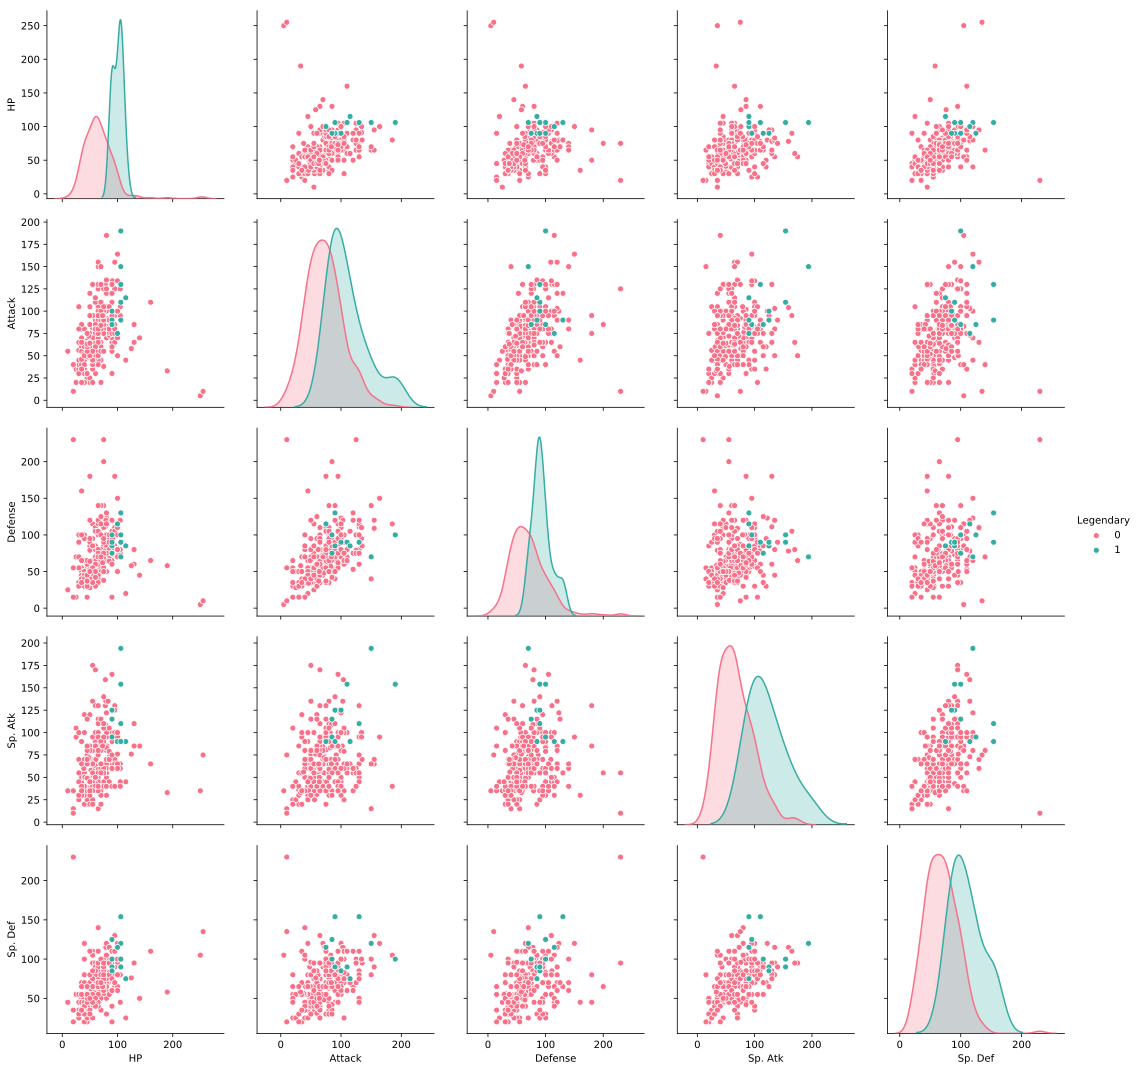

In [36]:
import seaborn as sb
%config InlineBackend.figure_format = 'svg'
s = sb.pairplot(pkmn, hue="Legendary",height = 3,vars=["HP","Attack","Defense","Sp. Atk", "Sp. Def"],palette="husl")

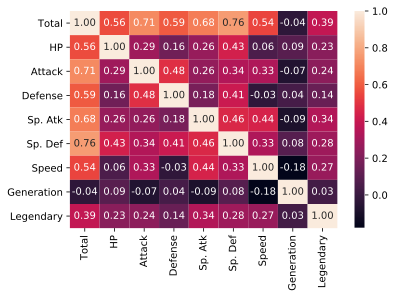

In [64]:
heat = sb.heatmap(pkmn_mlp.corr(),annot=True, fmt='.2f')

In [84]:
y = pkmn['Legendary'].values
X = pkmn.values[:,:-1]
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size = 0.4, random_state = 100)

In [85]:
mlp = MLPClassifier(hidden_layer_sizes=(4),max_iter=50)

In [86]:
mlp.fit(X_train,Y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=4, learning_rate='constant',
       learning_rate_init=0.001, max_iter=50, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [87]:
predictions = mlp.predict(X_test)

In [88]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [99]:
print('Accuracy: %.2f' % accuracy_score(Y_test, predictions))
print("Accuracy:%.2f%%" %(accuracy*100.0))

Accuracy: 0.89


In [90]:
print(confusion_matrix(Y_test,predictions))

[[285   0]
 [ 35   0]]


In [91]:
print(classification_report(Y_test,predictions))

             precision    recall  f1-score   support

          0       0.89      1.00      0.94       285
          1       0.00      0.00      0.00        35

avg / total       0.79      0.89      0.84       320



/Users/vish/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [97]:
print(mlp.predict_proba(X_test))

[[9.98119257e-01 1.88074342e-03]
 [1.00000000e+00 1.05313329e-18]
 [1.00000000e+00 4.98055676e-19]
 [9.99999805e-01 1.95370090e-07]
 [1.00000000e+00 6.36381546e-19]
 [1.00000000e+00 1.44104563e-17]
 [1.00000000e+00 3.08287155e-25]
 [9.99999242e-01 7.58208920e-07]
 [1.00000000e+00 3.43492522e-16]
 [1.00000000e+00 5.55880365e-17]
 [1.00000000e+00 1.32624240e-19]
 [1.00000000e+00 5.06207623e-14]
 [1.00000000e+00 1.91805493e-14]
 [1.00000000e+00 1.93474624e-15]
 [1.00000000e+00 2.24655563e-16]
 [1.00000000e+00 4.14385033e-11]
 [1.00000000e+00 2.78615449e-19]
 [1.00000000e+00 1.09611085e-18]
 [1.00000000e+00 1.96684599e-12]
 [9.99912710e-01 8.72902496e-05]
 [1.00000000e+00 1.08448352e-26]
 [9.99999998e-01 2.31750236e-09]
 [1.00000000e+00 1.11492504e-11]
 [1.00000000e+00 7.02852219e-16]
 [1.00000000e+00 2.01536487e-11]
 [1.00000000e+00 9.49892282e-20]
 [9.99999999e-01 5.14381880e-10]
 [1.00000000e+00 5.66325454e-15]
 [1.00000000e+00 1.84058431e-17]
 [1.00000000e+00 8.23599220e-23]
 [9.999999